<a href="https://colab.research.google.com/github/JOEJOSEJOSEPH/Decision_Tree_3/blob/main/Decision_Tree_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122881 entries, 0 to 122880
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    122881 non-null  int64  
 1   V1      122881 non-null  float64
 2   V2      122881 non-null  float64
 3   V3      122881 non-null  float64
 4   V4      122881 non-null  float64
 5   V5      122881 non-null  float64
 6   V6      122881 non-null  float64
 7   V7      122881 non-null  float64
 8   V8      122881 non-null  float64
 9   V9      122881 non-null  float64
 10  V10     122880 non-null  float64
 11  V11     122880 non-null  float64
 12  V12     122880 non-null  float64
 13  V13     122880 non-null  float64
 14  V14     122880 non-null  float64
 15  V15     122880 non-null  float64
 16  V16     122880 non-null  float64
 17  V17     122880 non-null  float64
 18  V18     122880 non-null  float64
 19  V19     122880 non-null  float64
 20  V20     122880 non-null  float64
 21  V21     12

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.Class.value_counts()

0.0    122630
1.0       250
Name: Class, dtype: int64

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

<Axes: >

In [ ]:
df=df.drop(df.index[-1])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88


In [ ]:
model = ExtraTreesClassifier()

# checking the accuracy with ExtraTreesClassifier()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pd.Series(y_pred).value_counts()

0.0    37196
1.0       61
dtype: int64

In [ ]:
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9994900287194353

In [ ]:
# 0.999369830641985 accuracy score is not because of its correctness but because of its imbalance nature


# Feature importance/selection

In [ ]:
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.01471678, 0.01257045, 0.01346234, 0.03758514, 0.03122663,
       0.01794398, 0.01411134, 0.02456775, 0.01434765, 0.03686699,
       0.07448887, 0.0618714 , 0.1062687 , 0.01171607, 0.11248657,
       0.01260686, 0.07254974, 0.14503201, 0.04280559, 0.01377716,
       0.01420732, 0.01684101, 0.01292732, 0.00840902, 0.01308432,
       0.01022406, 0.01674166, 0.01291287, 0.01233346, 0.01131695])

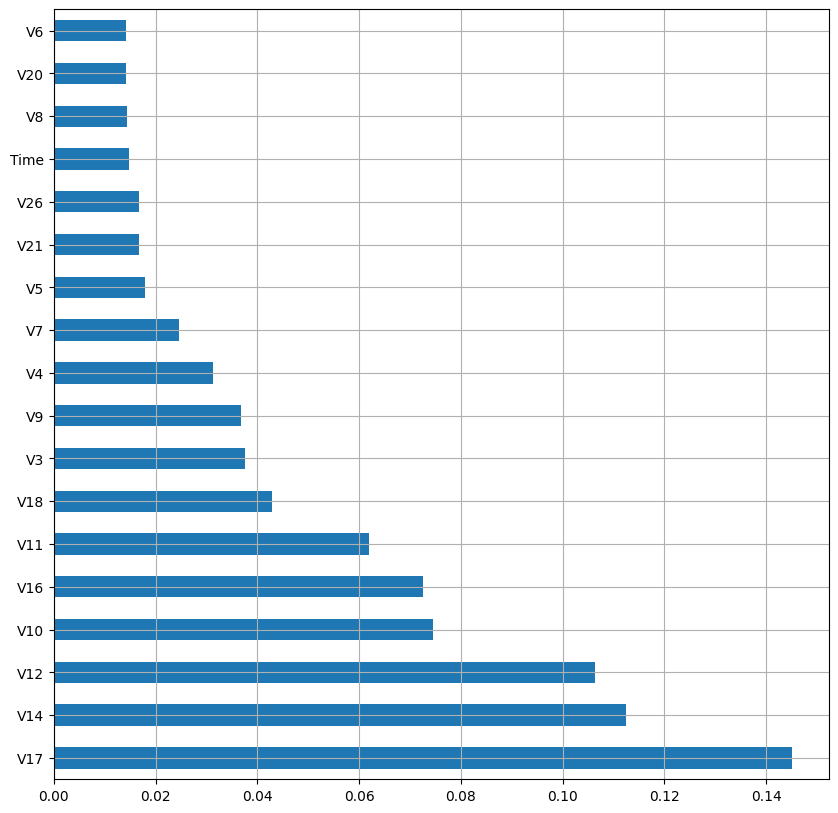

In [ ]:
plt.figure(figsize=(10,10))
feat = pd.Series(model.feature_importances_, index=X.columns)
feat.nlargest(18).plot(kind='barh')
plt.grid()

In [ ]:
plots = feat.nlargest(18)

In [ ]:
plots.index

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V18', 'V3', 'V9', 'V4', 'V7',
       'V5', 'V21', 'V26', 'Time', 'V8', 'V20', 'V6'],
      dtype='object')

In [ ]:
cols = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V18', 'V9', 'V4', 'V3', 'V7',
       'V21', 'V1', 'V26', 'Time', 'V2', 'V19', 'V8']
X_new = X[cols]

In [ ]:
X_new

,V17,V14,V12,V10,V11,V16,V18,V9,V4,V3,V7,V21,V1,V26,Time,V2,V19,V8
0,0.207971,-0.311169,-0.617801,0.090794,-0.551600,-0.470401,0.025791,0.363787,1.378155,2.536347,0.239599,-0.018307,-1.359807,-0.189115,0.0,-0.072781,0.403993,0.098698
1,-0.114805,-0.143772,1.065235,-0.166974,1.612727,0.463917,-0.183361,-0.255425,0.448154,0.166480,-0.078803,-0.225775,1.191857,0.125895,0.0,0.266151,-0.145783,0.085102
2,1.109969,-0.165946,0.066084,0.207643,0.624501,-2.890083,-0.121359,-1.514654,0.379780,1.773209,0.791461,0.247998,-1.358354,-0.139097,1.0,-1.340163,-2.261857,0.247676
3,-0.684093,-0.287924,0.178228,-0.054952,-0.226487,-1.059647,1.965775,-1.387024,-0.863291,1.792993,0.237609,-0.108300,-0.966272,-0.221929,1.0,-0.185226,-1.232622,0.377436
4,-0.237033,-1.119670,0.538196,0.753074,-0.822843,-0.451449,-0.038195,0.817739,0.403034,1.548718,0.592941,-0.009431,-1.158233,0.502292,2.0,0.877737,0.803487,-0.270533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.070441,-0.731707,0.190916,-0.657422,0.644837,0.599628,0.373110,-0.204064,-0.745097,-0.546012,0.812722,-0.314205,0.120316,0.124079,172785.0,0.931005,0.128904,0.115093
284802,1.991691,4.626942,2.711941,4.356170,-1.593105,1.107641,0.510632,1.914428,-2.066656,-9.834783,-4.918215,0.213454,-11.881118,0.250034,172786.0,10.071785,-0.682920,7.305334
284803,-0.025693,-0.675143,0.915802,-0.975926,-0.150189,-0.711757,-1.221179,0.584800,-0.738589,2.035030,0.024330,0.214205,-0.732789,-0.395255,172787.0,-0.055080,-1.545556,0.294869
284804,0.313502,-0.510602,0.063119,-0.484782,0.411614,0.140716,0.395652,0.432454,-0.557828,-3.249640,-0.296827,0.232045,1.919565,-0.087371,172788.0,-0.301254,-0.577252,0.708417


In [ ]:
X.shape

(284806, 30)

In [ ]:
X_new.shape

(284806, 18)

In [ ]:
skf = StratifiedKFold(n_splits=10)

In [ ]:
for train_index, test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
for train_index, test_index in skf.split(X_new,y):
  X_new_train, X_new_test = X_new.iloc[train_index], X_new.iloc[test_index]
  y_new_train, y_new_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X_train.shape

(256326, 30)

In [ ]:
X_new_train.shape

(256326, 18)

In [ ]:
decision = DecisionTreeClassifier()
randomf = RandomForestClassifier()

In [ ]:
n_estimators = [int(i) for i in np.linspace(100,1200,12)]
max_features = ['auto', 'sqrt']
max_depth = [int(i) for i in np.linspace(5,30,5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
parameters = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [ ]:
parameters

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 11, 17, 23, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [ ]:
rf_model = RandomizedSearchCV(estimator=randomf,
                              param_distributions=parameters,
                              scoring='neg_mean_squared_error',
                              n_jobs=1,
                              cv=5,
                              verbose=2,
                              random_state=42
                              )

In [ ]:
rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=17.6min
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=17.8min
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=17.9min


In [ ]:
randomf.fit(X_train,y_train)

NameError: name 'randomf' is not defined

In [ ]:
y_pred = randomf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)